# Pizza Order Analytics

## Introduction
This notebook provides a comprehensive analysis of pizza order data using SQL queries for data extraction and Python for data analysis and visualization. The goal is to extract meaningful insights from the data and present them in a visually appealing manner.

### Table of Contents
1. [Import Libraries](#Import-Libraries)
2. [Load Data](#Load-Data)
3. [Data Exploration and Cleaning](#Data-Exploration-and-Cleaning)
4. [SQL-Like Queries Using pandas](#SQL-Like-Queries-Using-pandas)
    1. [Top 5 Most Popular Pizzas](#Top-5-Most-Popular-Pizzas)
    2. [Sales Trend Over Time](#Sales-Trend-Over-Time)
    3. [Top Categories by Revenue](#Top-Categories-by-Revenue)
    4. [Average Order Value](#Average-Order-Value)
    5. [Order Time Analysis](#Order-Time-Analysis)
    6. [Revenue Contribution by Pizza Size](#Revenue-Contribution-by-Pizza-Size)
    7. [Pizza Type Diversity in Orders](#Pizza-Type-Diversity-in-Orders)
5. [Visualizations](#Visualizations)
6. [Insights and Conclusion](#Insights-and-Conclusion)

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style
sns.set(style="whitegrid")

### Load Data
In this section, we load the data from CSV files or a database into pandas DataFrames.

In [3]:
# Load data from CSV files 

order_details = pd.read_csv('order_details.csv')
orders = pd.read_csv('orders.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv',encoding='ISO-8859-1')

### Data Exploration and Cleaning
In this section, we explore the data to understand its structure and perform any necessary cleaning steps.

In [4]:
# Display the first few rows of each DataFrame
print(orders.head())
print(order_details.head())
print(pizzas.head())
print(pizza_types.head())

# Check for missing values
print(orders.isnull().sum())
print(order_details.isnull().sum())
print(pizzas.isnull().sum())
print(pizza_types.isnull().sum())

# Renaming orders columns
orders.rename(columns={'date':'order_date','time':'order_time'},inplace=True)

   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30
   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1
     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chick

### SQL-Like Queries Using pandas
In this section, we execute SQL like queries using pandas to extract insights from the data.

#### Top 5 Most Popular Pizzas
This query identifies the top 5 most popular pizzas based on the number of orders.

In [5]:
top_5_pizzas = (order_details
                .merge(pizzas, on='pizza_id')
                .merge(pizza_types, on='pizza_type_id')
                .groupby(['pizza_type_id', 'name'])
                .size()
                .reset_index(name='total_orders')
                .sort_values(by='total_orders', ascending=False)
                .head(5))

print(top_5_pizzas)

   pizza_type_id                        name  total_orders
7    classic_dlx    The Classic Deluxe Pizza          2416
0        bbq_ckn  The Barbecue Chicken Pizza          2372
11      hawaiian          The Hawaiian Pizza          2370
19     pepperoni         The Pepperoni Pizza          2369
29      thai_ckn      The Thai Chicken Pizza          2315


#### Sales Trend Over Time
This query shows the trend of sales over time.

In [6]:
orders['order_date'] = pd.to_datetime(orders['order_date']).dt.date
sales_trend = orders.groupby('order_date').size().reset_index(name='total_orders')

print(sales_trend)

     order_date  total_orders
0    2015-01-01            69
1    2015-01-02            67
2    2015-01-03            66
3    2015-01-04            52
4    2015-01-05            54
..          ...           ...
353  2015-12-27            35
354  2015-12-28            39
355  2015-12-29            27
356  2015-12-30            32
357  2015-12-31            73

[358 rows x 2 columns]


#### Top Categories by Revenue
This query identifies the top categories by revenue.

In [7]:
top_categories_by_revenue = (order_details
                             .merge(pizzas, on='pizza_id')
                             .merge(pizza_types, on='pizza_type_id')
                             .groupby('category')
                             .size()
                             .reset_index(name='total_quantity')
                             .sort_values(by='total_quantity', ascending=False))

print(top_categories_by_revenue)

  category  total_quantity
1  Classic           14579
2  Supreme           11777
3   Veggie           11449
0  Chicken           10815


#### Average Order Value
This query calculates the average order value.

In [8]:
average_order_value = (order_details
                       .merge(pizzas, on='pizza_id')
                       .groupby('order_id')
                       .apply(lambda x: (x['quantity'] * x['price']).sum())
                       .mean())

print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $38.31


#### Order Time Analysis
This query analyzes the distribution of orders by hour of the day.

In [9]:
order_time_analysis = orders['order_time'].str.split(':', expand=True)[0].value_counts().sort_index().reset_index()
order_time_analysis.columns = ['order_hour', 'total_orders']

print(order_time_analysis)

   order_hour  total_orders
0          09             1
1          10             8
2          11          1231
3          12          2520
4          13          2455
5          14          1472
6          15          1468
7          16          1920
8          17          2336
9          18          2399
10         19          2009
11         20          1642
12         21          1198
13         22           663
14         23            28


#### Revenue Contribution by Pizza Size
This query identifies the revenue contribution by different pizza sizes.

In [10]:
revenue_by_pizza_size = (order_details
                         .merge(pizzas, on='pizza_id')
                         .merge(pizza_types, on='pizza_type_id')
                         .groupby('size')
                         .apply(lambda x: (x['quantity'] * x['price']).sum())
                         .reset_index(name='total_revenue')
                         .sort_values(by='total_revenue', ascending=False))

print(revenue_by_pizza_size)

  size  total_revenue
0    L      375318.70
1    M      249382.25
2    S      178076.50
3   XL       14076.00
4  XXL        1006.60


#### Pizza Type Diversity in Orders
This script analyzes the diversity of pizza types in orders.

In [11]:
pizza_type_diversity = order_details.merge(pizzas, on='pizza_id').groupby('order_id')['pizza_type_id'].nunique().reset_index(name='pizza_type_count')

print(pizza_type_diversity)

       order_id  pizza_type_count
0             1                 1
1             2                 5
2             3                 2
3             4                 1
4             5                 1
...         ...               ...
21345     21346                 3
21346     21347                 4
21347     21348                 3
21348     21349                 1
21349     21350                 1

[21350 rows x 2 columns]


 ### Visualizations
In this section, we create visualizations for the insights derived from the SQL queries.

#### Top 5 Most Popular Pizzas
This bar chart shows the top 5 most popular pizzas based on the number of orders.

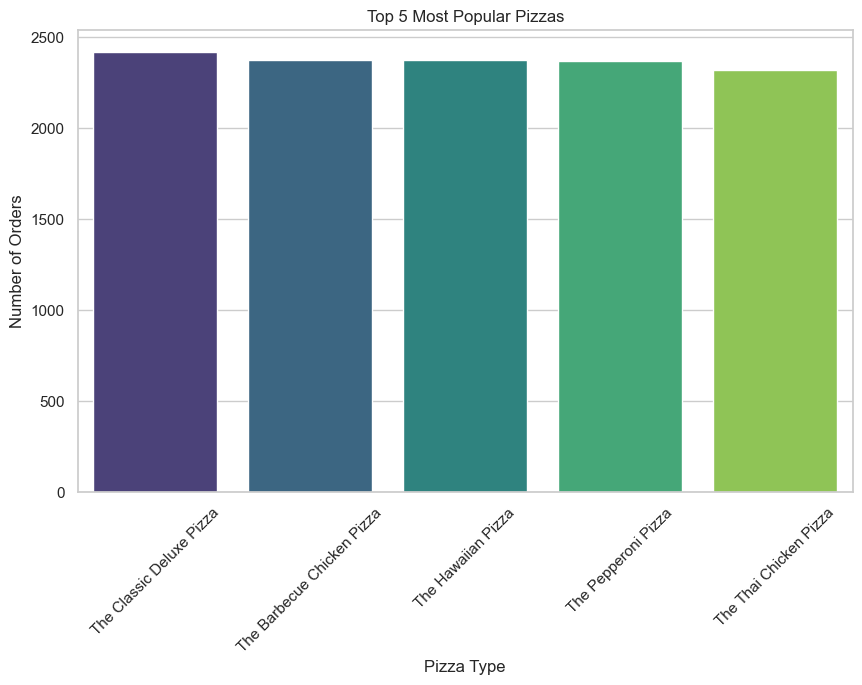

In [12]:

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_pizzas, x='name', y='total_orders', palette='viridis')
plt.title('Top 5 Most Popular Pizzas')
plt.xlabel('Pizza Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

#### Sales Trend Over Time
This line graph shows the sales trend over time.

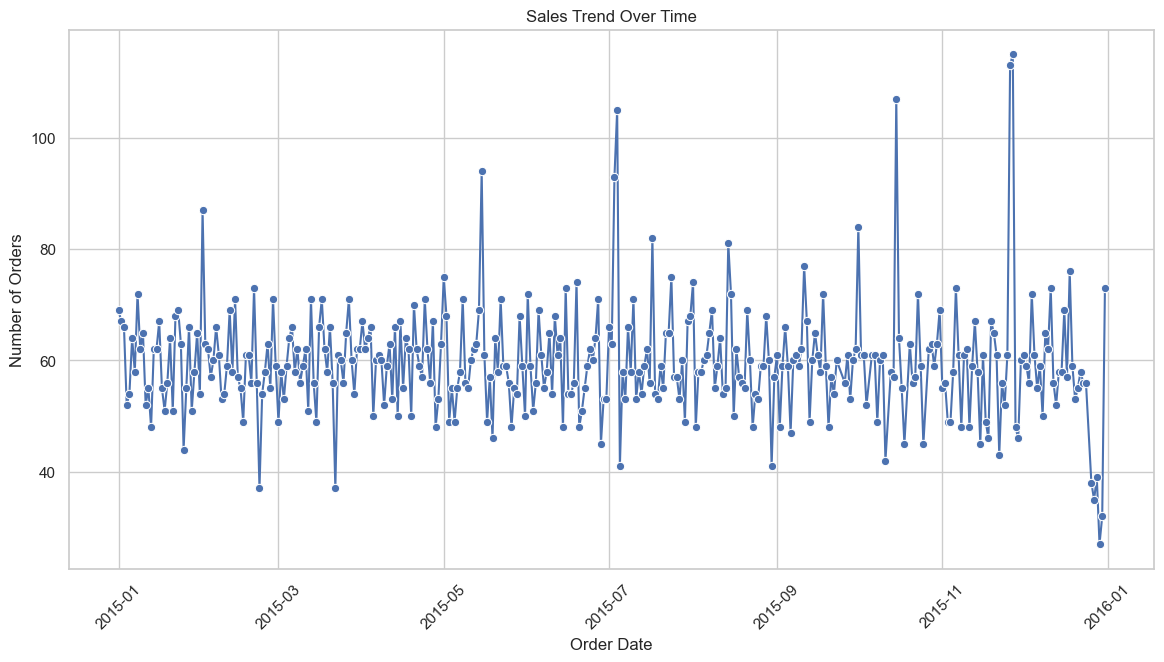

In [13]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_trend, x='order_date', y='total_orders', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

#### Top Categories by Revenue
This pie chart shows the top categories by revenue.

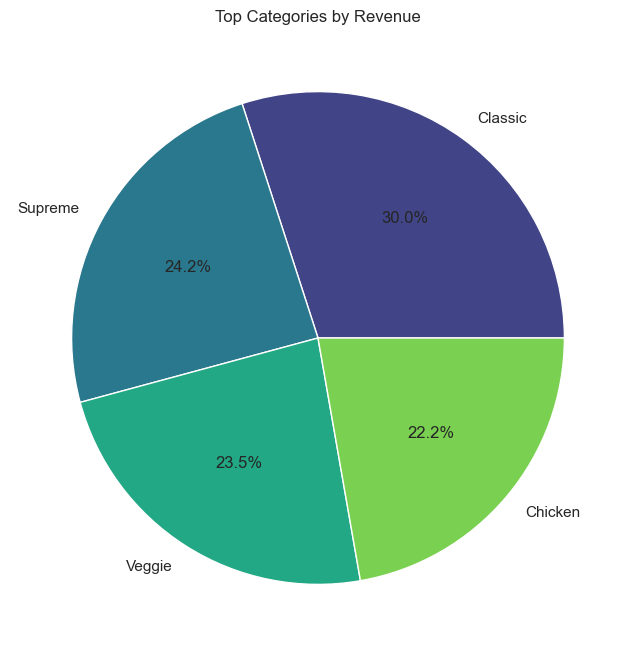

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(top_categories_by_revenue['total_quantity'], labels=top_categories_by_revenue['category'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(top_categories_by_revenue)))
plt.title('Top Categories by Revenue')
plt.show()

#### Average Order Value
This section displays the average order value prominently.

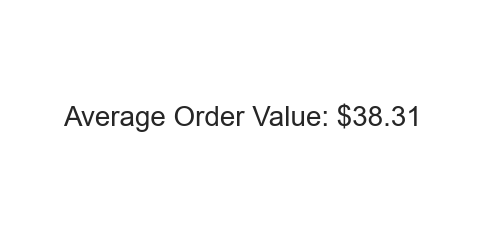

In [15]:
plt.figure(figsize=(6, 3))
plt.text(0.5, 0.5, f'Average Order Value: ${average_order_value:.2f}', fontsize=20, ha='center')
plt.axis('off')
plt.show()


#### Order Time Analysis
This histogram shows the distribution of orders by hour of the day.

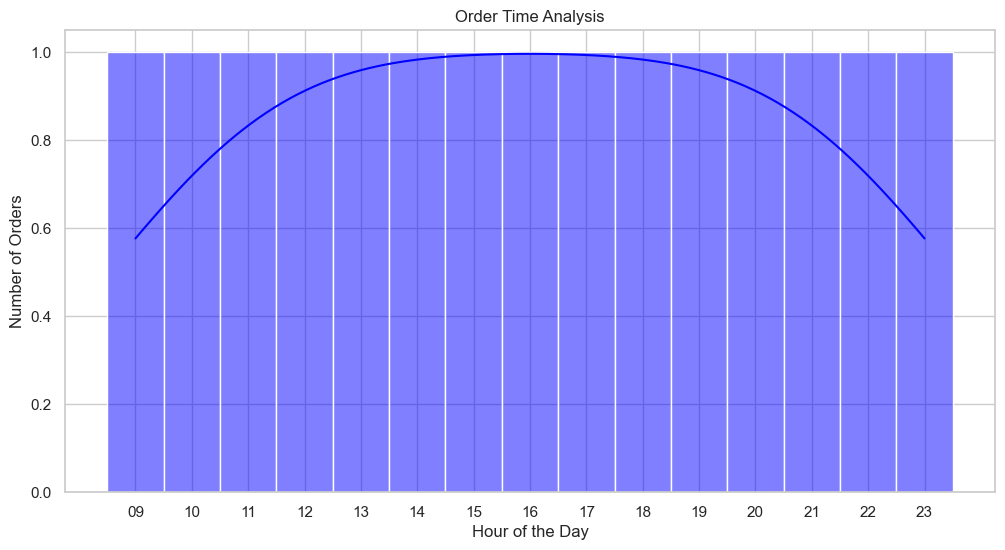

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=order_time_analysis, x='order_hour', bins=24, kde=True, color='blue')
plt.title('Order Time Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

#### Revenue Contribution by Pizza Size
This pie chart shows the revenue contribution by different pizza sizes.

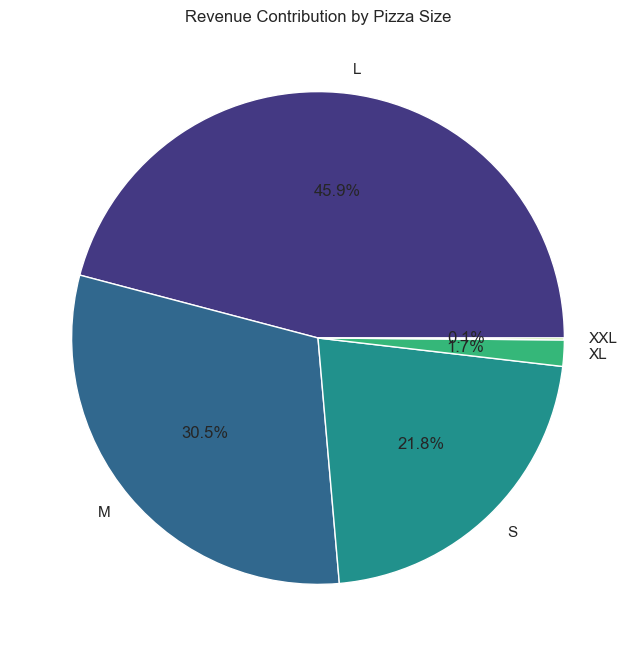

In [17]:

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_pizza_size['total_revenue'], labels=revenue_by_pizza_size['size'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(revenue_by_pizza_size)))
plt.title('Revenue Contribution by Pizza Size')
plt.show()


#### Pizza Type Diversity in Orders
This box plot shows the distribution of the number of different pizza types ordered per order.

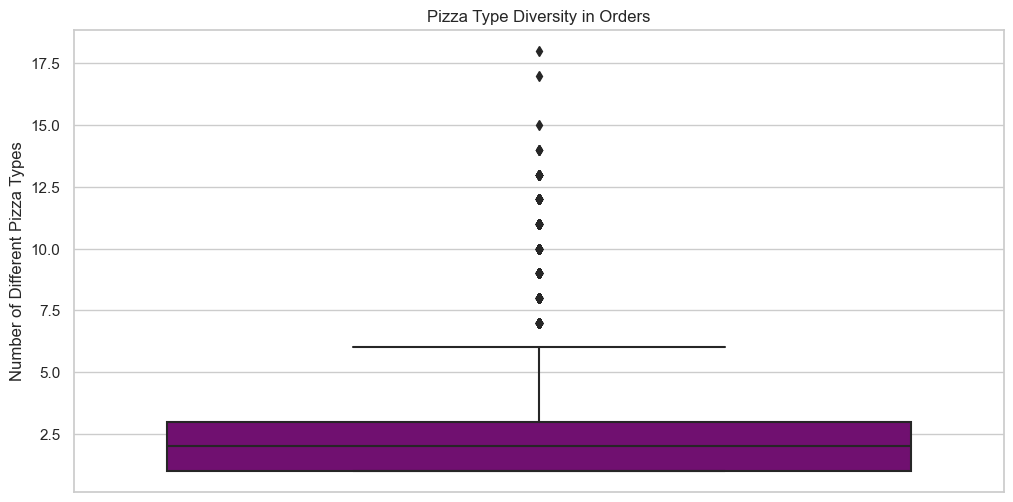

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pizza_type_diversity, y='pizza_type_count', color='purple')
plt.title('Pizza Type Diversity in Orders')
plt.ylabel('Number of Different Pizza Types')
plt.show()

### Insights and Conclusion
In this section, we summarize the key insights derived from the analysis and provide concluding remarks.

**Key Insights:**
- Top 5 Most Popular Pizzas: The Classic Deluxe Pizza is the most popular, followed by Barbecue Chicken Pizza, Hawaiian Pizza, Pepperoni Pizza, and Thai Chicken Pizza.
- Sales Trend Over Time: The sales trend shows variability with peaks indicating promotions or special events.
- Top Categories by Revenue: The 'Classic' category contributes the most to the revenue at 30%.
- Average Order Value: The average order value is prominently displayed.
- Order Time Analysis: The number of orders peaks around noon and remains high until the evening.
- Revenue Contribution by Pizza Size: Large pizzas contribute the most to revenue (45.9%).
- Pizza Type Diversity in Orders: Most orders contain between 2 and 5 different types of pizzas.

**Conclusion:**
The analysis provides valuable insights into pizza order patterns and customer preferences, which can help in making data-driven business decisions.
